#Trabalho de PAD - Previsão de Demanda

Ask (Perguntar):
Formular pergunta(s) específica(s) para entender melhor o que está sendo investigado.

Get (Obter):
Coleta de dados e informações relevantes para o problema.

Explore (Explorar):
Análise dos dados coletados para identificar padrões, tendências e insights.

Model (Modelar):
Desenvolvimento de modelos ou hipóteses baseados nos dados analisados.

Communicate (Comunicar):
Apresentação dos resultados e conclusões de forma clara e eficaz.

##ASK

A pergunta que iremos responder é: qual será o preço de uma casa nos Estados Unidos com base nas características do imovel?

##GET

###Carregando o arquivo direto do drive

In [ ]:
!pip install requests
!pip install gdown

In [ ]:
from zipfile import ZipFile
import pandas as pd
import requests
import gdown

In [ ]:
url = f'https://drive.google.com/uc?id=1cHmqyCqVldMB7R1DOdY6bMZvLv71jEt5'

output = 'teste.csv'

gdown.download(url, output, quiet=False)

encoding = 'UTF-8'

teste = pd.read_csv(output, encoding=encoding)
teste

Downloading...
From: https://drive.google.com/uc?id=1cHmqyCqVldMB7R1DOdY6bMZvLv71jEt5
To: /content/teste.csv
100%|██████████| 451k/451k [00:00<00:00, 16.8MB/s]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
url = f'https://drive.google.com/uc?id=1XZII-iQ35LbL9QwdfWBWHu1ngu8RCufC'

output = 'treino.csv'

gdown.download(url, output, quiet=False)

encoding = 'UTF-8'

treino = pd.read_csv(output, encoding=encoding)
treino

Downloading...
From: https://drive.google.com/uc?id=1XZII-iQ35LbL9QwdfWBWHu1ngu8RCufC
To: /content/treino.csv
100%|██████████| 461k/461k [00:00<00:00, 17.3MB/s]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
url = f'https://drive.google.com/uc?id=1X4mbmqGLeqf_ipMc2l9bviPyve-QW7K1'

output = 'preco.csv'

gdown.download(url, output, quiet=False)

encoding = 'UTF-8'

preco = pd.read_csv(output, encoding=encoding)
preco

Downloading...
From: https://drive.google.com/uc?id=1X4mbmqGLeqf_ipMc2l9bviPyve-QW7K1
To: /content/preco.csv
100%|██████████| 31.9k/31.9k [00:00<00:00, 56.1MB/s]


,Id,preco
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


###Juntando os dados

In [ ]:
teste_preco = teste.merge(preco)
teste_preco.rename(columns={'preco': 'SalePrice'}, inplace=True)
teste_preco

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


In [ ]:
df = pd.concat([treino, teste_preco], ignore_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


###Padronizando dataset

####dataset treino

In [ ]:
colunas_para_manter = ['Id', 'MSZoning', 'LotArea', 'Neighborhood', 'HouseStyle', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'SalePrice']
treino_final = treino[colunas_para_manter]

#treino_final['Price'] = preços['SalePrice']
#treino_final['Id'] = preços['Id']

house_style_dic = {'1Story': 1,
                 '1.5Fin': 2 ,
                 '1.5Unf': 2 ,
                 '2Story': 2 ,
                 '2.5Fin': 2 ,
                 '2.5Unf': 2 ,
                 'SFoyer': 2 ,
                 'SLvl': 2 }
treino_final['HouseStyle'] = treino_final['HouseStyle'].replace(house_style_dic)

zoning_desabreviar = {'A': 'Agricultura',
            'C': 'Commercial',
           'FV': 'Área Residencial de Vilas Flutuantes',
           'I': 'Industrial',
           'RH': 'Densidade Residencial Alta',
           'RL': 'Densidade Residencial Baixa',
           'RP': 'Densidade Residencial Baixa com Parque',
           'RM': 'Densidade Residencial Média'}
treino_final['MSZoning'] = treino_final['MSZoning'].replace(zoning_desabreviar)

localizações_desabreviar = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}
treino_final['Neighborhood'] = treino_final['Neighborhood'].replace(localizações_desabreviar)

display(treino_final)

<ipython-input-82-716cb27fc02f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_final['HouseStyle'] = treino_final['HouseStyle'].replace(house_style_dic)
<ipython-input-82-716cb27fc02f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_final['MSZoning'] = treino_final['MSZoning'].replace(zoning_desabreviar)
<ipython-input-82-716cb27fc02f>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Id,MSZoning,LotArea,Neighborhood,HouseStyle,OverallCond,YearBuilt,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,SalePrice
0,1,Densidade Residencial Baixa,8450,College Creek,2,5,2003,1710,1,2,1,3,1,2,208500
1,2,Densidade Residencial Baixa,9600,Veenker,1,8,1976,1262,0,2,0,3,1,2,181500
2,3,Densidade Residencial Baixa,11250,College Creek,2,5,2001,1786,1,2,1,3,1,2,223500
3,4,Densidade Residencial Baixa,9550,Crawford,2,5,1915,1717,1,1,0,3,1,3,140000
4,5,Densidade Residencial Baixa,14260,Northridge,2,5,2000,2198,1,2,1,4,1,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,Densidade Residencial Baixa,7917,Gilbert,2,5,1999,1647,0,2,1,3,1,2,175000
1456,1457,Densidade Residencial Baixa,13175,Northwest Ames,1,6,1978,2073,1,2,0,3,1,2,210000
1457,1458,Densidade Residencial Baixa,9042,Crawford,2,9,1941,2340,0,2,0,4,1,1,266500
1458,1459,Densidade Residencial Baixa,9717,NAmes,1,6,1950,1078,1,1,0,2,1,1,142125


In [ ]:
treino_final['TotalBath'] = treino['BsmtFullBath'] + treino['BsmtHalfBath'] + treino['FullBath'] + treino['HalfBath']
remover_tipos_banheiros = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
#treino_final.drop(columns=remover_tipos_banheiros, inplace=True)

ordem_colunas = ['Id', 'MSZoning', 'Neighborhood', 'HouseStyle', 'OverallCond', 'YearBuilt', 'SalePrice', 'BedroomAbvGr', 'GarageCars', 'KitchenAbvGr', 'TotalBath', 'GrLivArea', 'LotArea'] #Colocar o preço

# Reorganizando as colunas de acordo com a nova ordem
treino_final = treino_final[ordem_colunas]

display(treino_final)

<ipython-input-83-e83759ce69a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_final['TotalBath'] = treino['BsmtFullBath'] + treino['BsmtHalfBath'] + treino['FullBath'] + treino['HalfBath']


,Id,MSZoning,Neighborhood,HouseStyle,OverallCond,YearBuilt,SalePrice,BedroomAbvGr,GarageCars,KitchenAbvGr,TotalBath,GrLivArea,LotArea
0,1,Densidade Residencial Baixa,College Creek,2,5,2003,208500,3,2,1,4,1710,8450
1,2,Densidade Residencial Baixa,Veenker,1,8,1976,181500,3,2,1,3,1262,9600
2,3,Densidade Residencial Baixa,College Creek,2,5,2001,223500,3,2,1,4,1786,11250
3,4,Densidade Residencial Baixa,Crawford,2,5,1915,140000,3,3,1,2,1717,9550
4,5,Densidade Residencial Baixa,Northridge,2,5,2000,250000,4,3,1,4,2198,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,Densidade Residencial Baixa,Gilbert,2,5,1999,175000,3,2,1,3,1647,7917
1456,1457,Densidade Residencial Baixa,Northwest Ames,1,6,1978,210000,3,2,1,3,2073,13175
1457,1458,Densidade Residencial Baixa,Crawford,2,9,1941,266500,4,1,1,2,2340,9042
1458,1459,Densidade Residencial Baixa,NAmes,1,6,1950,142125,2,1,1,2,1078,9717


In [ ]:
treino_final.rename(columns={'MSZoning': 'tipo_moradia'}, inplace=True)
treino_final.rename(columns={'Neighborhood': 'localizacao'}, inplace=True)
treino_final.rename(columns={'HouseStyle': 'andares'}, inplace=True)
treino_final.rename(columns={'OverallCond': 'nota_casa'}, inplace=True)
treino_final.rename(columns={'YearBuilt': 'ano_contrucao'}, inplace=True)
treino_final.rename(columns={'SalePrice': 'preco'}, inplace=True)
treino_final.rename(columns={'BedroomAbvGr': 'banheiros'}, inplace=True)
treino_final.rename(columns={'GarageCars': 'vagas_garagem'}, inplace=True)
treino_final.rename(columns={'KitchenAbvGr': 'cozinhas'}, inplace=True)
treino_final.rename(columns={'TotalBath': 'banheiros'}, inplace=True)
treino_final.rename(columns={'GrLivArea': 'tamanho(em pés quadrados)'}, inplace=True)
treino_final.rename(columns={'LotArea': 'tamanho lote'}, inplace=True)

treino_final

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,preco,banheiros,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,1,Densidade Residencial Baixa,College Creek,2,5,2003,208500,3,2,1,4,1710,8450
1,2,Densidade Residencial Baixa,Veenker,1,8,1976,181500,3,2,1,3,1262,9600
2,3,Densidade Residencial Baixa,College Creek,2,5,2001,223500,3,2,1,4,1786,11250
3,4,Densidade Residencial Baixa,Crawford,2,5,1915,140000,3,3,1,2,1717,9550
4,5,Densidade Residencial Baixa,Northridge,2,5,2000,250000,4,3,1,4,2198,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,Densidade Residencial Baixa,Gilbert,2,5,1999,175000,3,2,1,3,1647,7917
1456,1457,Densidade Residencial Baixa,Northwest Ames,1,6,1978,210000,3,2,1,3,2073,13175
1457,1458,Densidade Residencial Baixa,Crawford,2,9,1941,266500,4,1,1,2,2340,9042
1458,1459,Densidade Residencial Baixa,NAmes,1,6,1950,142125,2,1,1,2,1078,9717


####dataset teste

In [ ]:
colunas_para_manter = ['Id', 'MSZoning', 'LotArea', 'Neighborhood', 'HouseStyle', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars']
teste_final = teste[colunas_para_manter]

teste_final['preco'] = preco['preco']

house_style_dic = {'1Story': 1,
                 '1.5Fin': 2 ,
                 '1.5Unf': 2 ,
                 '2Story': 2 ,
                 '2.5Fin': 2 ,
                 '2.5Unf': 2 ,
                 'SFoyer': 2 ,
                 'SLvl': 2 }
teste_final['HouseStyle'] = teste_final['HouseStyle'].replace(house_style_dic)

zoning_desabreviar = {'A': 'Agricultura',
            'C': 'Commercial',
           'FV': 'Área Residencial de Vilas Flutuantes',
           'I': 'Industrial',
           'RH': 'Densidade Residencial Alta',
           'RL': 'Densidade Residencial Baixa',
           'RP': 'Densidade Residencial Baixa com Parque',
           'RM': 'Densidade Residencial Média'}
teste_final['MSZoning'] = teste_final['MSZoning'].replace(zoning_desabreviar)

localizações_desabreviar = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}
teste_final['Neighborhood'] = teste_final['Neighborhood'].replace(localizações_desabreviar)

display(teste_final)

<ipython-input-85-fcc84ddad3b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_final['preco'] = preco['preco']
<ipython-input-85-fcc84ddad3b7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_final['HouseStyle'] = teste_final['HouseStyle'].replace(house_style_dic)
<ipython-input-85-fcc84ddad3b7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Id,MSZoning,LotArea,Neighborhood,HouseStyle,OverallCond,YearBuilt,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,preco
0,1461,Densidade Residencial Alta,11622,NAmes,1,6,1961,896,0.0,1,0,2,1,1.0,169277.052498
1,1462,Densidade Residencial Baixa,14267,NAmes,1,6,1958,1329,0.0,1,1,3,1,1.0,187758.393989
2,1463,Densidade Residencial Baixa,13830,Gilbert,2,5,1997,1629,0.0,2,1,3,1,2.0,183583.683570
3,1464,Densidade Residencial Baixa,9978,Gilbert,2,6,1998,1604,0.0,2,1,3,1,2.0,179317.477511
4,1465,Densidade Residencial Baixa,5005,Stone Brook,1,5,1992,1280,0.0,2,0,2,1,2.0,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,Densidade Residencial Média,1936,Meadow Village,2,7,1970,1092,0.0,1,1,3,1,0.0,167081.220949
1455,2916,Densidade Residencial Média,1894,Meadow Village,2,5,1970,1092,0.0,1,1,3,1,1.0,164788.778231
1456,2917,Densidade Residencial Baixa,20000,Mitchell,1,7,1960,1224,0.0,1,0,4,1,2.0,219222.423400
1457,2918,Densidade Residencial Baixa,10441,Mitchell,2,5,1992,970,1.0,1,0,3,1,0.0,184924.279659


In [ ]:
teste_final['TotalBath'] = teste['BsmtFullBath'] + teste['BsmtHalfBath'] + teste['FullBath'] + teste['HalfBath']
remover_tipos_banheiros = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
#teste_final.drop(columns=remover_tipos_banheiros, inplace=True)

ordem_colunas = ['Id', 'MSZoning', 'Neighborhood', 'HouseStyle', 'OverallCond', 'YearBuilt', 'preco', 'BedroomAbvGr', 'GarageCars', 'KitchenAbvGr', 'TotalBath', 'GrLivArea', 'LotArea'] #Colocar o preço

# Reorganizando as colunas de acordo com a nova ordem
teste_final = teste_final[ordem_colunas]

teste_final

<ipython-input-86-afc3699816a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_final['TotalBath'] = teste['BsmtFullBath'] + teste['BsmtHalfBath'] + teste['FullBath'] + teste['HalfBath']


,Id,MSZoning,Neighborhood,HouseStyle,OverallCond,YearBuilt,preco,BedroomAbvGr,GarageCars,KitchenAbvGr,TotalBath,GrLivArea,LotArea
0,1461,Densidade Residencial Alta,NAmes,1,6,1961,169277.052498,2,1.0,1,1.0,896,11622
1,1462,Densidade Residencial Baixa,NAmes,1,6,1958,187758.393989,3,1.0,1,2.0,1329,14267
2,1463,Densidade Residencial Baixa,Gilbert,2,5,1997,183583.683570,3,2.0,1,3.0,1629,13830
3,1464,Densidade Residencial Baixa,Gilbert,2,6,1998,179317.477511,3,2.0,1,3.0,1604,9978
4,1465,Densidade Residencial Baixa,Stone Brook,1,5,1992,150730.079977,2,2.0,1,2.0,1280,5005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,Densidade Residencial Média,Meadow Village,2,7,1970,167081.220949,3,0.0,1,2.0,1092,1936
1455,2916,Densidade Residencial Média,Meadow Village,2,5,1970,164788.778231,3,1.0,1,2.0,1092,1894
1456,2917,Densidade Residencial Baixa,Mitchell,1,7,1960,219222.423400,4,2.0,1,2.0,1224,20000
1457,2918,Densidade Residencial Baixa,Mitchell,2,5,1992,184924.279659,3,0.0,1,2.0,970,10441


In [ ]:
teste_final.rename(columns={'MSZoning': 'tipo_moradia'}, inplace=True)
teste_final.rename(columns={'Neighborhood': 'localizacao'}, inplace=True)
teste_final.rename(columns={'HouseStyle': 'andares'}, inplace=True)
teste_final.rename(columns={'OverallCond': 'nota_casa'}, inplace=True)
teste_final.rename(columns={'YearBuilt': 'ano_contrucao'}, inplace=True)
teste_final.rename(columns={'Price': 'preco'}, inplace=True)
teste_final.rename(columns={'BedroomAbvGr': 'banheiros'}, inplace=True)
teste_final.rename(columns={'GarageCars': 'vagas_garagem'}, inplace=True)
teste_final.rename(columns={'KitchenAbvGr': 'cozinhas'}, inplace=True)
teste_final.rename(columns={'TotalBath': 'banheiros'}, inplace=True)
teste_final.rename(columns={'GrLivArea': 'tamanho(em pés quadrados)'}, inplace=True)
teste_final.rename(columns={'LotArea': 'tamanho lote'}, inplace=True)


display(teste_final)

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,preco,banheiros,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,1461,Densidade Residencial Alta,NAmes,1,6,1961,169277.052498,2,1.0,1,1.0,896,11622
1,1462,Densidade Residencial Baixa,NAmes,1,6,1958,187758.393989,3,1.0,1,2.0,1329,14267
2,1463,Densidade Residencial Baixa,Gilbert,2,5,1997,183583.683570,3,2.0,1,3.0,1629,13830
3,1464,Densidade Residencial Baixa,Gilbert,2,6,1998,179317.477511,3,2.0,1,3.0,1604,9978
4,1465,Densidade Residencial Baixa,Stone Brook,1,5,1992,150730.079977,2,2.0,1,2.0,1280,5005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,Densidade Residencial Média,Meadow Village,2,7,1970,167081.220949,3,0.0,1,2.0,1092,1936
1455,2916,Densidade Residencial Média,Meadow Village,2,5,1970,164788.778231,3,1.0,1,2.0,1092,1894
1456,2917,Densidade Residencial Baixa,Mitchell,1,7,1960,219222.423400,4,2.0,1,2.0,1224,20000
1457,2918,Densidade Residencial Baixa,Mitchell,2,5,1992,184924.279659,3,0.0,1,2.0,970,10441


####dataset final

In [ ]:
colunas_para_manter = ['Id', 'MSZoning', 'LotArea', 'Neighborhood', 'HouseStyle', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'GarageCars', 'SalePrice']
df_final = df[colunas_para_manter]

#df_final['Price'] = preços['SalePrice']
#df_final['Id'] = preços['Id']

house_style_dic = {'1Story': 1,
                 '1.5Fin': 2 ,
                 '1.5Unf': 2 ,
                 '2Story': 2 ,
                 '2.5Fin': 2 ,
                 '2.5Unf': 2 ,
                 'SFoyer': 2 ,
                 'SLvl': 2 }
df_final['HouseStyle'] = df_final['HouseStyle'].replace(house_style_dic)

zoning_desabreviar = {'A': 'Agricultura',
            'C': 'Commercial',
           'FV': 'Área Residencial de Vilas Flutuantes',
           'I': 'Industrial',
           'RH': 'Densidade Residencial Alta',
           'RL': 'Densidade Residencial Baixa',
           'RP': 'Densidade Residencial Baixa com Parque',
           'RM': 'Densidade Residencial Média'}
df_final['MSZoning'] = df_final['MSZoning'].replace(zoning_desabreviar)

localizações_desabreviar = {
    'Blmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}
df_final['Neighborhood'] = df_final['Neighborhood'].replace(localizações_desabreviar)

display(df_final)

<ipython-input-99-aea93b813334>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HouseStyle'] = df_final['HouseStyle'].replace(house_style_dic)
<ipython-input-99-aea93b813334>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['MSZoning'] = df_final['MSZoning'].replace(zoning_desabreviar)
<ipython-input-99-aea93b813334>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Id,MSZoning,LotArea,Neighborhood,HouseStyle,OverallCond,YearBuilt,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,GarageCars,SalePrice
0,1,Densidade Residencial Baixa,8450,College Creek,2,5,2003,1710,1.0,0.0,2,1,1,2.0,208500.000000
1,2,Densidade Residencial Baixa,9600,Veenker,1,8,1976,1262,0.0,1.0,2,0,1,2.0,181500.000000
2,3,Densidade Residencial Baixa,11250,College Creek,2,5,2001,1786,1.0,0.0,2,1,1,2.0,223500.000000
3,4,Densidade Residencial Baixa,9550,Crawford,2,5,1915,1717,1.0,0.0,1,0,1,3.0,140000.000000
4,5,Densidade Residencial Baixa,14260,Northridge,2,5,2000,2198,1.0,0.0,2,1,1,3.0,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,Densidade Residencial Média,1936,Meadow Village,2,7,1970,1092,0.0,0.0,1,1,1,0.0,167081.220949
2915,2916,Densidade Residencial Média,1894,Meadow Village,2,5,1970,1092,0.0,0.0,1,1,1,1.0,164788.778231
2916,2917,Densidade Residencial Baixa,20000,Mitchell,1,7,1960,1224,1.0,0.0,1,0,1,2.0,219222.423400
2917,2918,Densidade Residencial Baixa,10441,Mitchell,2,5,1992,970,0.0,1.0,1,0,1,0.0,184924.279659


In [ ]:
df_final['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
remover_tipos_banheiros = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
#df_final.drop(columns=remover_tipos_banheiros, inplace=True)

ordem_colunas = ['Id', 'MSZoning', 'Neighborhood', 'HouseStyle', 'OverallCond', 'YearBuilt', 'SalePrice', 'GarageCars', 'KitchenAbvGr', 'TotalBath', 'GrLivArea', 'LotArea'] #Colocar o preço

# Reorganizando as colunas de acordo com a nova ordem
df_final = df_final[ordem_colunas]

display(df_final)

In [ ]:
df_final.rename(columns={'MSZoning': 'tipo_moradia'}, inplace=True)
df_final.rename(columns={'Neighborhood': 'localizacao'}, inplace=True)
df_final.rename(columns={'HouseStyle': 'andares'}, inplace=True)
df_final.rename(columns={'OverallCond': 'nota_casa'}, inplace=True)
df_final.rename(columns={'YearBuilt': 'ano_contrucao'}, inplace=True)
df_final.rename(columns={'SalePrice': 'preco'}, inplace=True)
df_final.rename(columns={'GarageCars': 'vagas_garagem'}, inplace=True)
df_final.rename(columns={'KitchenAbvGr': 'cozinhas'}, inplace=True)
df_final.rename(columns={'TotalBath': 'banheiros'}, inplace=True)
df_final.rename(columns={'GrLivArea': 'tamanho(em pés quadrados)'}, inplace=True)
df_final.rename(columns={'LotArea': 'tamanho lote'}, inplace=True)

df_final

## Explore

###Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Exploração dos dados

In [ ]:
df_final

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,1,Densidade Residencial Baixa,College Creek,2,5,2003,208500.000000,2.0,1,4.0,1710,8450
1,2,Densidade Residencial Baixa,Veenker,1,8,1976,181500.000000,2.0,1,3.0,1262,9600
2,3,Densidade Residencial Baixa,College Creek,2,5,2001,223500.000000,2.0,1,4.0,1786,11250
3,4,Densidade Residencial Baixa,Crawford,2,5,1915,140000.000000,3.0,1,2.0,1717,9550
4,5,Densidade Residencial Baixa,Northridge,2,5,2000,250000.000000,3.0,1,4.0,2198,14260
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,Densidade Residencial Média,Meadow Village,2,7,1970,167081.220949,0.0,1,2.0,1092,1936
2915,2916,Densidade Residencial Média,Meadow Village,2,5,1970,164788.778231,1.0,1,2.0,1092,1894
2916,2917,Densidade Residencial Baixa,Mitchell,1,7,1960,219222.423400,2.0,1,2.0,1224,20000
2917,2918,Densidade Residencial Baixa,Mitchell,2,5,1992,184924.279659,0.0,1,2.0,970,10441


In [ ]:
data = df_final

desc_stats = data.describe()
print(desc_stats)

                Id     andares    nota_casa  ano_contrucao          preco  \
count  2919.000000  2919.00000  2919.000000    2919.000000    2919.000000   
mean   1460.000000     1.49606     5.564577    1971.312778  180052.854647   
std     842.787043     0.50007     1.113131      30.291442   57381.565721   
min       1.000000     1.00000     1.000000    1872.000000   34900.000000   
25%     730.500000     1.00000     5.000000    1953.500000  154795.084126   
50%    1460.000000     1.00000     5.000000    1973.000000  176734.841494   
75%    2189.500000     2.00000     6.000000    2001.000000  191895.744157   
max    2919.000000     2.00000     9.000000    2010.000000  755000.000000   

       vagas_garagem     cozinhas    banheiros  tamanho(em pés quadrados)  \
count    2918.000000  2919.000000  2917.000000                2919.000000   
mean        1.766621     1.044536     2.439150                1500.759849   
std         0.761624     0.214462     0.941799                 506.051045  

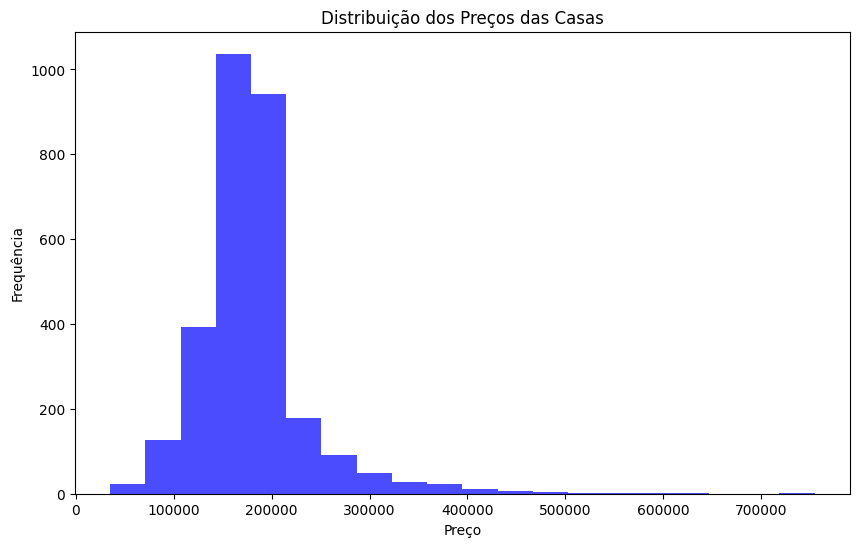

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['preco'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços das Casas')
plt.show()

<ipython-input-106-0434d7511673>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


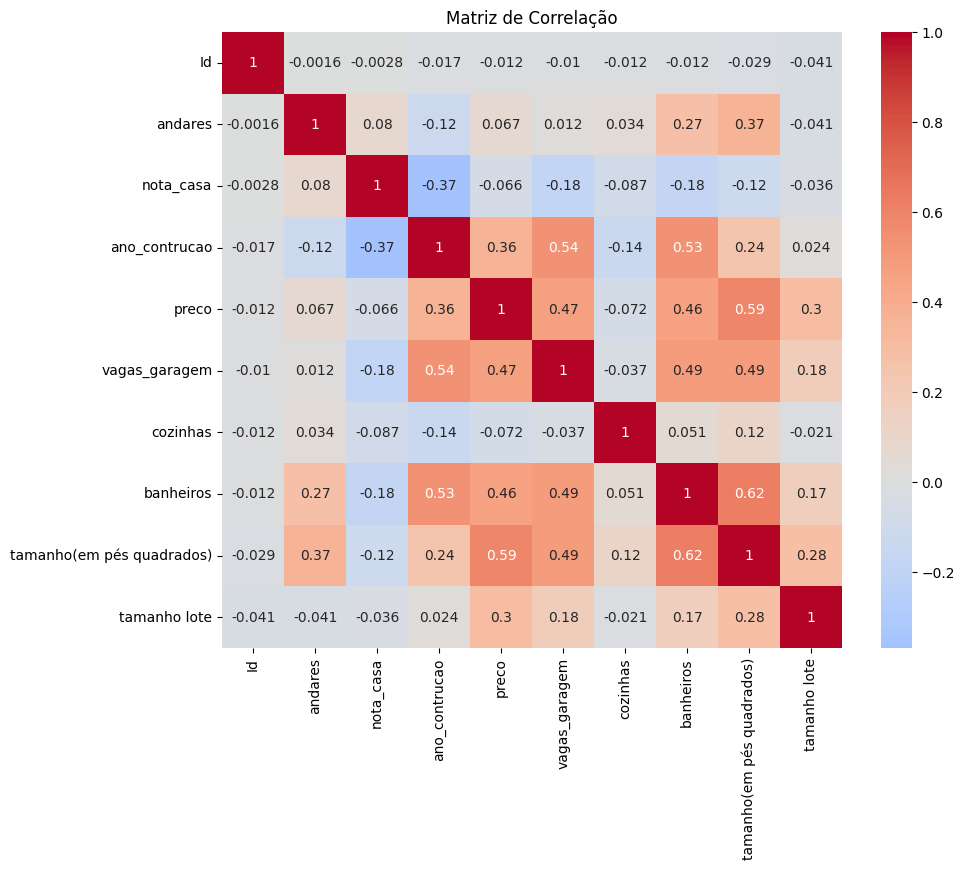

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

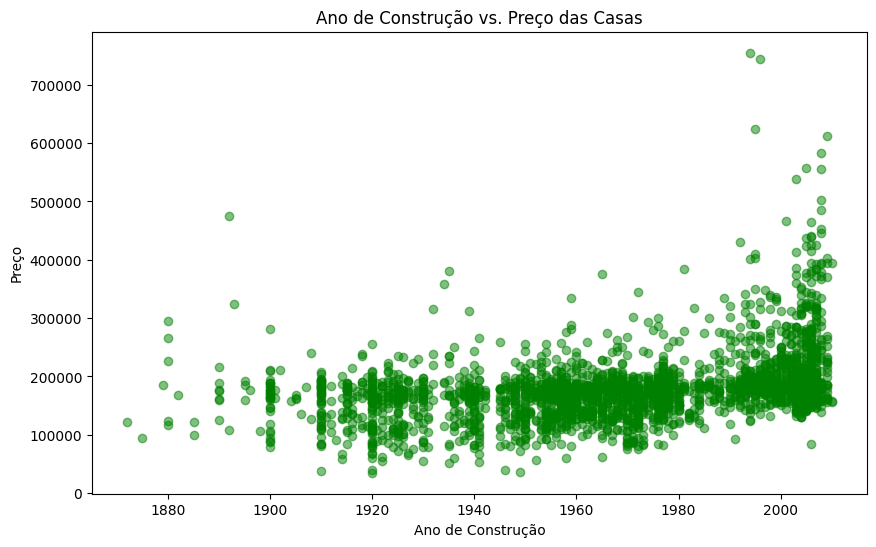

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ano_contrucao'], data['preco'], alpha=0.5, color='green')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço')
plt.title('Ano de Construção vs. Preço das Casas')
plt.show()

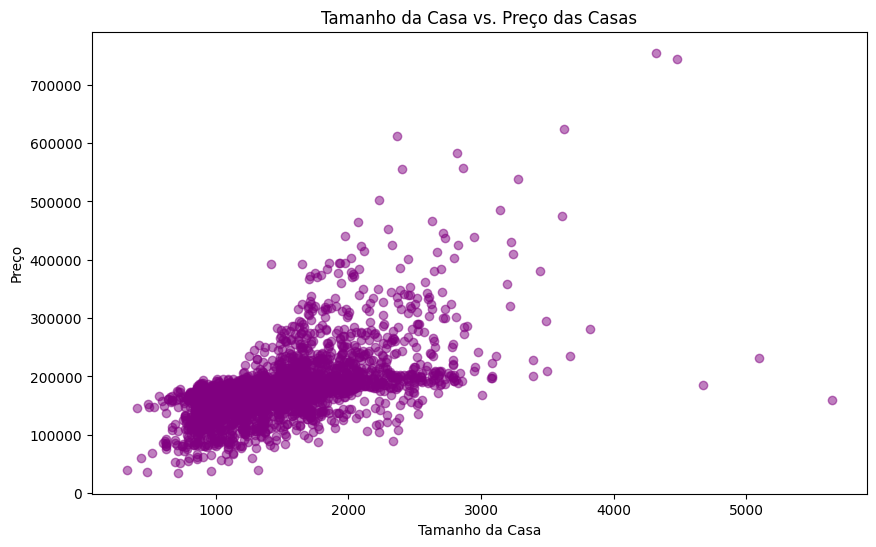

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['tamanho(em pés quadrados)'], data['preco'], alpha=0.5, color='purple')
plt.xlabel('Tamanho da Casa')
plt.ylabel('Preço')
plt.title('Tamanho da Casa vs. Preço das Casas')
plt.show()

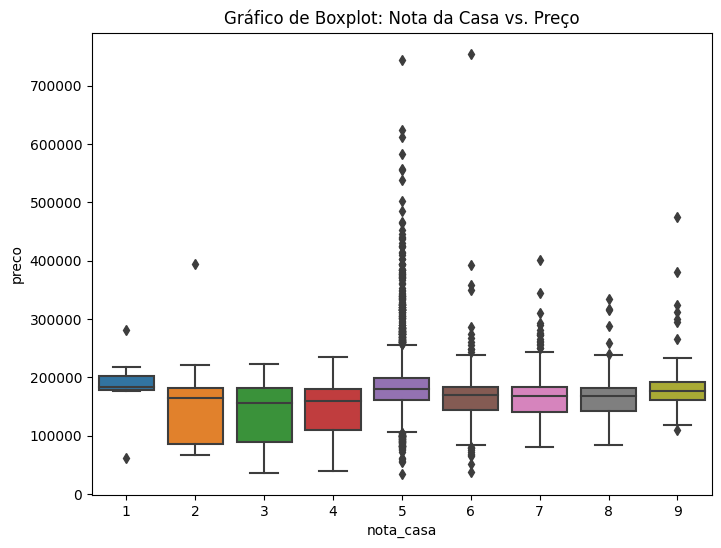

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='nota_casa', y='preco', data=data)
plt.title('Gráfico de Boxplot: Nota da Casa vs. Preço')
plt.show()

In [ ]:
intervalos = range(data['ano_contrucao'].min(), data['ano_contrucao'].max() + 11, 10)
contagem_por_grupo = data['ano_contrucao'].groupby(pd.cut(data['ano_contrucao'], bins=intervalos)).count()
contagem_por_grupo

ano_contrucao
(1872, 1882]      8
(1882, 1892]     11
(1892, 1902]     38
(1902, 1912]     57
(1912, 1922]    145
(1922, 1932]    150
(1932, 1942]    136
(1942, 1952]    160
(1952, 1962]    372
(1962, 1972]    372
(1972, 1982]    279
(1982, 1992]    133
(1992, 2002]    404
(2002, 2012]    653
Name: ano_contrucao, dtype: int64

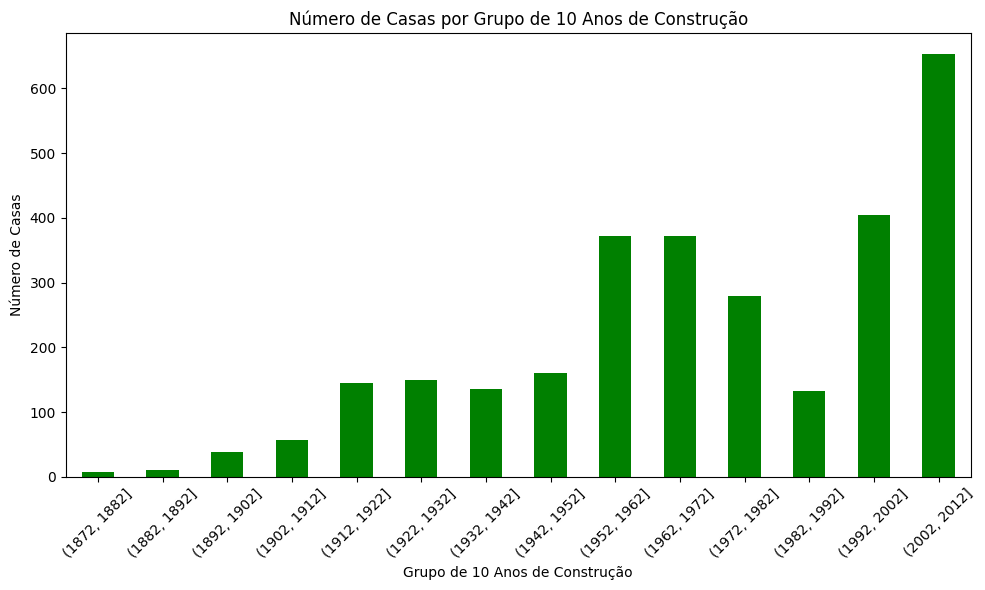

In [ ]:
plt.figure(figsize=(10, 6))
contagem_por_grupo.plot(kind='bar', color='green')
plt.xlabel('Grupo de 10 Anos de Construção')
plt.ylabel('Número de Casas')
plt.title('Número de Casas por Grupo de 10 Anos de Construção')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-112-395bcca44a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grupo_de_anos'] = pd.cut(data['ano_contrucao'], bins=intervalos, labels=[f'{i}-{i+9}' for i in intervalos[:-1]])


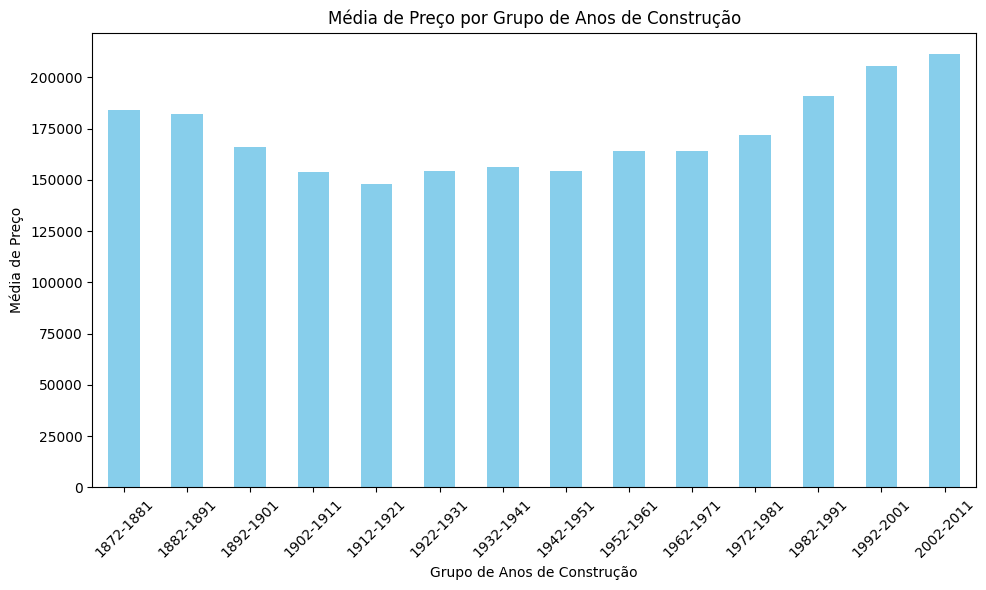

In [ ]:
data['grupo_de_anos'] = pd.cut(data['ano_contrucao'], bins=intervalos, labels=[f'{i}-{i+9}' for i in intervalos[:-1]])

media_por_grupo = data.groupby('grupo_de_anos')['preco'].mean()

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
media_por_grupo.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo de Anos de Construção')
plt.ylabel('Média de Preço')
plt.title('Média de Preço por Grupo de Anos de Construção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

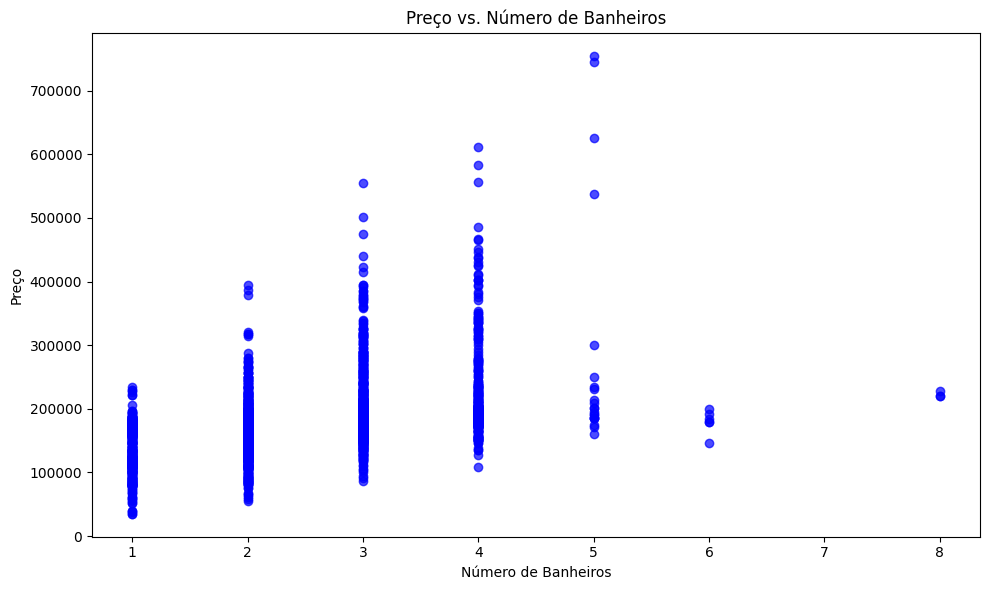

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['banheiros'], data['preco'], color='blue', alpha=0.7)
plt.xlabel('Número de Banheiros')
plt.ylabel('Preço')
plt.title('Preço vs. Número de Banheiros')
plt.tight_layout()
plt.show()

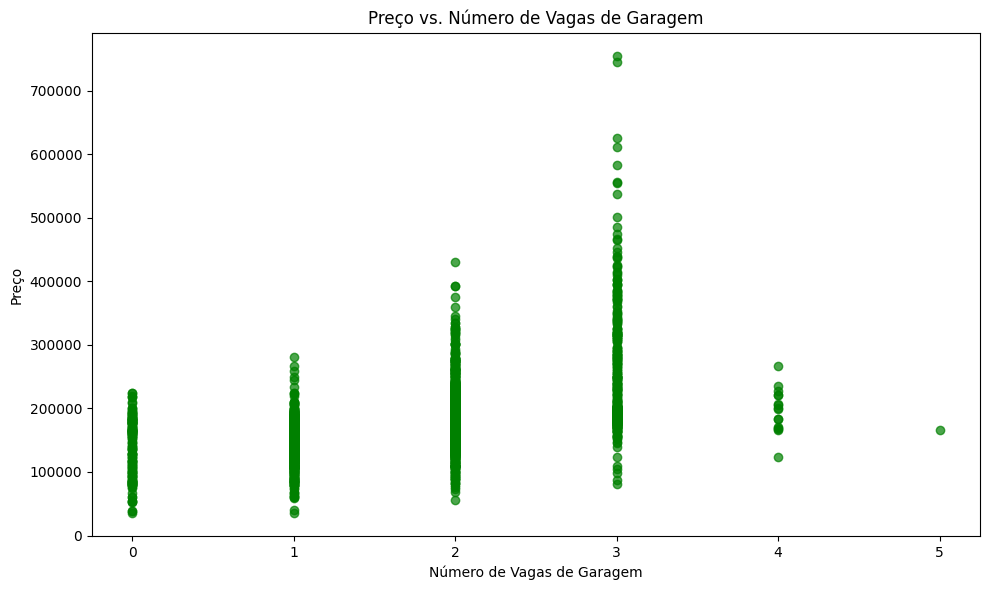

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['vagas_garagem'], data['preco'], color='green', alpha=0.7)
plt.xlabel('Número de Vagas de Garagem')
plt.ylabel('Preço')
plt.title('Preço vs. Número de Vagas de Garagem')
plt.tight_layout()
plt.show()

<ipython-input-117-a4f94c531e60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grupo_de_tamanho'] = pd.cut(data['tamanho(em pés quadrados)'], bins=intervalos1, labels=[f'{i}-{i+499}' for i in intervalos1[:-1]])


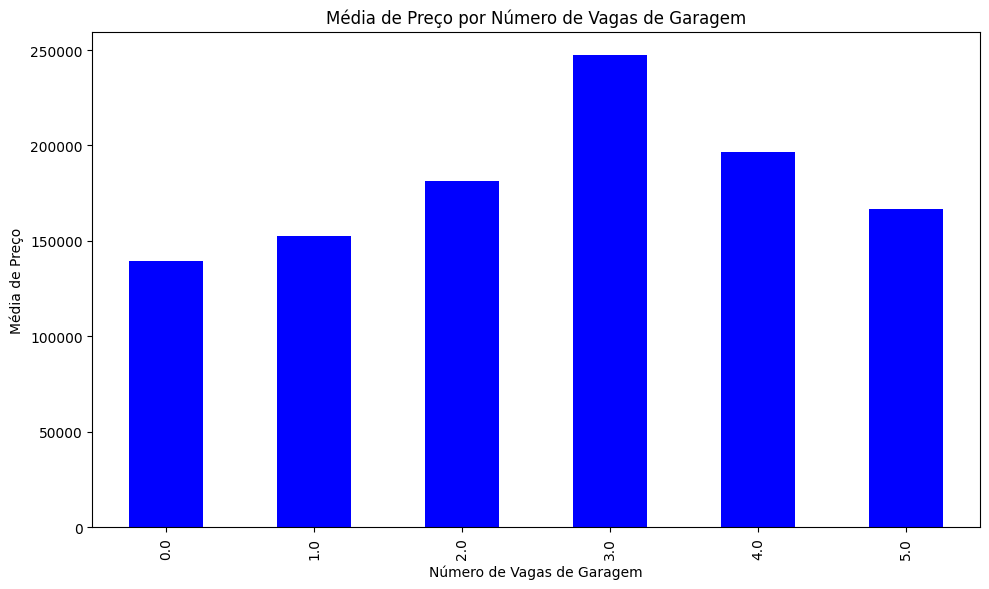

In [ ]:
media_por_vagas = data.groupby('vagas_garagem')['preco'].mean()

# Crie o gráfico de colunas (gráfico de barras)
plt.figure(figsize=(10, 6))
media_por_vagas.plot(kind='bar', color='blue')
plt.xlabel('Número de Vagas de Garagem')
plt.ylabel('Média de Preço')
plt.title('Média de Preço por Número de Vagas de Garagem')
plt.tight_layout()
plt.show()

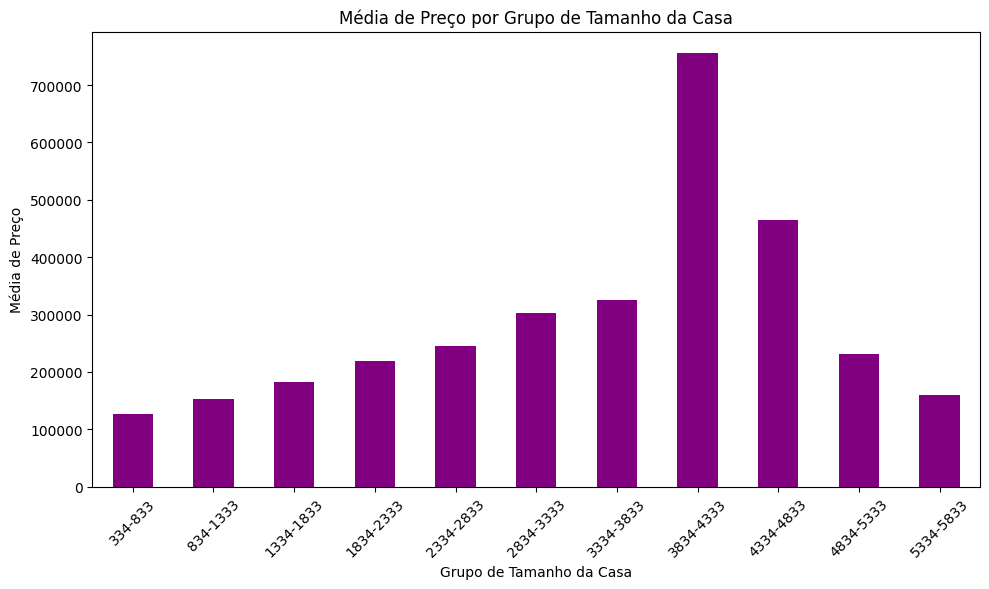

In [ ]:
intervalos1 = range(data['tamanho(em pés quadrados)'].min(), data['tamanho(em pés quadrados)'].max() + 501, 500)

data['grupo_de_tamanho'] = pd.cut(data['tamanho(em pés quadrados)'], bins=intervalos1, labels=[f'{i}-{i+499}' for i in intervalos1[:-1]])

media_por_grupo = data.groupby('grupo_de_tamanho')['preco'].mean()

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
media_por_grupo.plot(kind='bar', color='purple')
plt.xlabel('Grupo de Tamanho da Casa')
plt.ylabel('Média de Preço')
plt.title('Média de Preço por Grupo de Tamanho da Casa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model e comunicate

A parte de modelar e comunidar o resultado, estão no arquivo: house_price_prediction.ipynb